Сегодня мы рассмотрим примеры моделей, которые можно использовать для задачи регрессии и попробуем их сравнить.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import RobustScaler
# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

C:\tools\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [6]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])


```
 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
 LSTAT    percentage lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
```



In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20, random_state=1)

In [8]:
len(y_train)

404

In [9]:
%%time
lasso = Lasso(alpha = 1, random_state=0)
lasso_model = lasso.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_train)

print(np.sqrt(mean_squared_error(y_train, y_pred_lasso)))

y_pred_lasso = lasso_model.predict(X_train)

y_pred_test_lasso = lasso_model.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)))



5.197296786244317
5.964778128710208
Wall time: 8.98 ms


In [10]:
%%time
gradientBoosting = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =0)
gradientBoosting_model = gradientBoosting.fit(X_train, y_train)
y_pred_gradientBoosting = gradientBoosting_model.predict(X_train)

print(np.sqrt(mean_squared_error(y_train, y_pred_gradientBoosting)))

y_pred_test_gradientBoosting = gradientBoosting_model.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred_test_gradientBoosting)))

1.0532085905968258
3.052579892047551
Wall time: 11.2 s


(1e-06, 100.0)

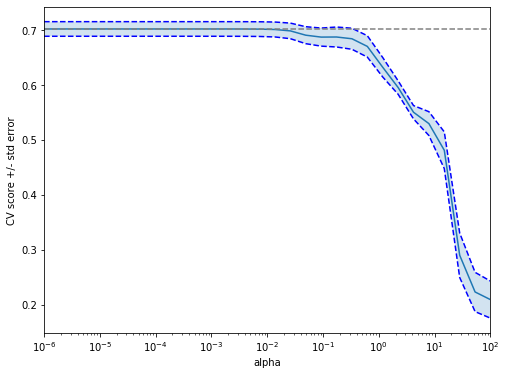

In [12]:
#from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-6, 2, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])

In [13]:
%%time
lasso = Lasso(alpha =0.000001, random_state=0)
lasso_model = lasso.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_train)

print(np.sqrt(mean_squared_error(y_train, y_pred_lasso)))

y_pred_test_lasso = lasso_model.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)))

4.675766751587022
4.835372570038747
Wall time: 3.99 ms


In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

In [23]:
%%time
lasso = Lasso(alpha =0.0001, random_state=0)
lasso_model = lasso.fit(X_poly, y_train)
y_pred_lasso = lasso_model.predict(X_poly)
print(np.sqrt(mean_squared_error(y_train, y_pred_lasso)))



1.8206673534483655
Wall time: 138 ms


C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.736e+02, tolerance: 3.264e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [24]:
X_poly_test = poly.transform(X_test)
y_pred_test_lasso = lasso_model.predict(X_poly_test)
print(np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)))

2.867769484668197


In [25]:
%%time
lasso = Lasso(alpha =0.0001, random_state=0,  max_iter=10000)
lasso_model = lasso.fit(X_poly, y_train)
y_pred_lasso = lasso_model.predict(X_poly)
print(np.sqrt(mean_squared_error(y_train, y_pred_lasso)))

1.3945127848791878
Wall time: 1.77 s


C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.988e+02, tolerance: 3.264e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [26]:
X_poly_test = poly.transform(X_test)
y_pred_test_lasso = lasso_model.predict(X_poly_test)
print(np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)))

3.386727049142463


In [18]:
%%time
lasso = Lasso(alpha =0.0001, random_state=0,  max_iter=100000)
lasso_model = lasso.fit(X_poly, y_train)
y_pred_lasso = lasso_model.predict(X_poly)
print(np.sqrt(mean_squared_error(y_train, y_pred_lasso)))

1.0240871317785132
Wall time: 21.9 s


C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.191e+02, tolerance: 3.264e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [21]:
X_poly_test = poly.transform(X_test)
y_pred_test_lasso = lasso_model.predict(X_poly_test)
print(np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)))


5.884062053879767


C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.537e+02, tolerance: 2.681e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.091e+02, tolerance: 2.548e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of

C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.209e+02, tolerance: 2.548e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.449e+02, tolerance: 2.744e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of

C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.918e+02, tolerance: 2.744e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.729e+02, tolerance: 2.441e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Wall time: 1min 10s


C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.179e+03, tolerance: 2.629e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


(0.0001, 100.0)

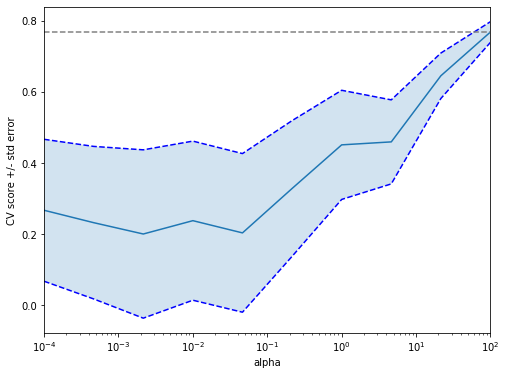

In [27]:
%%time
#from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, 2, 10)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_poly, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])

C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.208e+03, tolerance: 2.681e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.206e+03, tolerance: 2.548e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of

C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.907e+03, tolerance: 2.548e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.933e+03, tolerance: 2.744e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of

(100.0, 100000.0)

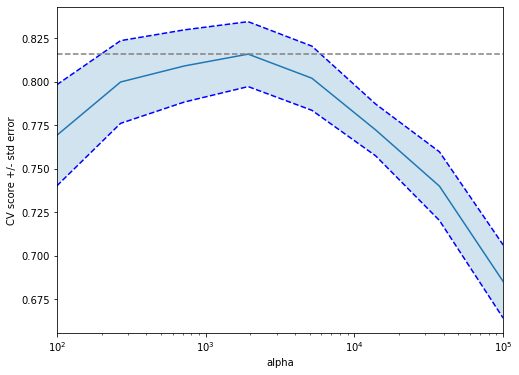

In [28]:
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(2, 5, 8)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_poly, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])

In [47]:
scores

array([0.76925574, 0.79990089, 0.80912405, 0.81591789, 0.80206854,
       0.77232528, 0.74002949, 0.68516247])

In [48]:
alphas

array([   100.        ,    268.26957953,    719.685673  ,   1930.69772888,
         5179.47467923,  13894.95494373,  37275.93720315, 100000.        ])

In [31]:
%%time
lasso = Lasso(alpha = 1930.69772888, random_state=0,  max_iter=10000)
lasso_model = lasso.fit(X_poly, y_train)
y_pred_lasso = lasso_model.predict(X_poly)
print(np.sqrt(mean_squared_error(y_train, y_pred_lasso)))

X_poly_test = poly.transform(X_test)
y_pred_test_lasso = lasso_model.predict(X_poly_test)
print(np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)))

3.112452310903477
3.209236474544778
Wall time: 974 ms


C:\Users\Alexander\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.239e+03, tolerance: 3.264e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [43]:
xgb = XGBRegressor(nthread = -1, objective='reg:squarederror')
lgbm = LGBMRegressor(objective='regression', random_state=0)
randomForest = RandomForestRegressor(random_state=0)

In [44]:
def run_model(model):
  trained_model = model.fit(X_train, y_train)
  y_pred_model = trained_model.predict(X_train)
  print(np.sqrt(mean_squared_error(y_train, y_pred_model)))

  X_poly_test = poly.fit_transform(X_test)
  y_pred_test_model = trained_model.predict(X_test)
  print(np.sqrt(mean_squared_error(y_test, y_pred_test_model)))


In [45]:
run_model(xgb)


1.4241936102698567
2.818446896358722


In [38]:
run_model(lgbm)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1031
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 13
[LightGBM] [Info] Start training from score 22.522277
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [54]:
run_model(randomForest)

1.173636467110106
2.9932609046217906


In [39]:
xgb_0 = XGBRegressor(nthread = -1, reg_lambda=0)

In [40]:
run_model(xgb_0)

[14:42:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1.3356965395529676
2.716788728576023


In [41]:
tuned_parameters = {"max_depth":[2, 3 ,4], "learning_rate":[0.1, 0.2, 0.05], "n_estimators":[5, 10, 50, 100, 200]}

In [46]:
%%time
clf = GridSearchCV(xgb, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_poly, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

In [47]:
scores

array([-1.75360698e+00, -1.30624339e-01,  8.46050236e-01,  8.62247379e-01,
        8.69043242e-01, -1.73230585e+00, -1.11254239e-01,  8.55443192e-01,
        8.62256055e-01,  8.63375361e-01, -1.74078004e+00, -1.11853888e-01,
        8.54822358e-01,  8.59846024e-01,  8.60349766e-01, -4.59667999e-02,
        6.93223874e-01,  8.62526065e-01,  8.70143762e-01,  8.71938713e-01,
       -1.99568996e-03,  7.27390442e-01,  8.57915071e-01,  8.59547241e-01,
        8.60649786e-01, -1.58850050e-02,  7.31272709e-01,  8.64165243e-01,
        8.64598453e-01,  8.64563334e-01, -3.46951878e+00, -1.80888908e+00,
        7.60017868e-01,  8.51365491e-01,  8.68433444e-01, -3.47116756e+00,
       -1.79226745e+00,  7.81236524e-01,  8.60802657e-01,  8.69228411e-01,
       -3.47605063e+00, -1.80691084e+00,  7.90456465e-01,  8.58182724e-01,
        8.61813310e-01])

In [48]:
clf.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200}

In [49]:
xgb_best = XGBRegressor(nthread = -1, learning_rate = 0.2, max_depth = 2, n_estimators = 200)
run_model(xgb_best)

[14:52:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1.1808559770839973
2.9606610812362537


In [52]:
tuned_parameters = {"reg_lambda":[0, 0.01, 0.1, 1, 2]}
clf = GridSearchCV(xgb_best, tuned_parameters, cv=n_folds, refit=True)
clf.fit(X_poly, y_train)

clf.best_params_



[14:56:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:56:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:56:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:56:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:56:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:56:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:56:21] WARNI

{'reg_lambda': 1}

In [56]:
xgb_best = XGBRegressor(nthread = -1, learning_rate = 0.2, max_depth = 2, n_estimators = 200, reg_lambda = 1)
run_model(xgb_best)

[14:57:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1.1808559770839973
2.9606610812362537
